In [6]:
%load_ext autoreload
%autoreload 2

In [1]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [2]:
# input
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0

img_resized = tf.image.resize(img, [256,256], method='bicubic', preserve_aspect_ratio=False)
img_resized = tf.transpose(img_resized, [2, 0, 1])
img_input = img_resized.numpy()
reshape_img = img_input.reshape(1,3,256,256)
tensor = tf.convert_to_tensor(reshape_img, dtype=tf.float32)

In [4]:
# load model
module = hub.load("https://tfhub.dev/intel/midas/v2_1_small/1", tags=['serve'])
output = module.signatures['serving_default'](tensor)
prediction = output['default'].numpy()
prediction = prediction.reshape(256, 256)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [5]:
from utils.eval import *

 Write image to: output.png


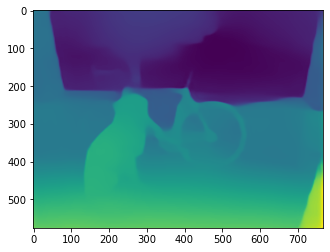

In [7]:
# output file
prediction = cv2.resize(prediction, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
print(" Write image to: output.png")
depth_min = prediction.min()
depth_max = prediction.max()
img_out = (255 * (prediction - depth_min) / (depth_max - depth_min)).astype("uint8")

cv2.imwrite("output.png", img_out)
plt.imshow(img_out)
# plt.show()